In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [2]:
cartography_df = pd.read_csv('./sem-eval-fear-cartography.csv', index_col=0)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1423360083,People’s deepest passions often scare them too...,0.194599,0.268681,0.029146,0.805401,0.268681,0.970853,1,1,0.714286,0.805401,0.268681,1.0,True,0.75
1,1423360084,Being playful as shit😤,0.784134,0.287294,0.986483,0.215866,0.287294,0.013517,0,0,0.000000,0.784134,0.287294,1.0,True,1.00
2,1423360085,@EE your a joke I pay for data when I'm in Spa...,0.739192,0.156908,0.919617,0.260808,0.156908,0.080383,0,0,0.000000,0.739192,0.156908,1.0,True,1.00
3,1423360086,@tomsteinfort expected i thought #fear,0.164600,0.258395,0.022080,0.835400,0.258395,0.977920,1,1,1.000000,0.835400,0.258395,1.0,True,1.00
4,1423360087,Every day I dread doing an 8 hour shift in ret...,0.045806,0.027937,0.014852,0.954194,0.027937,0.985148,1,1,0.625000,0.954194,0.027937,1.0,True,0.75


In [3]:
cartography_df['agreement_factor'] = cartography_df.apply(lambda row: row.agreement_factor if row.label == 1 else 1 - row.agreement_factor, axis=1)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1423360083,People’s deepest passions often scare them too...,0.194599,0.268681,0.029146,0.805401,0.268681,0.970853,1,1,0.714286,0.805401,0.268681,1.0,True,0.75
1,1423360084,Being playful as shit😤,0.784134,0.287294,0.986483,0.215866,0.287294,0.013517,0,0,1.000000,0.784134,0.287294,1.0,True,1.00
2,1423360085,@EE your a joke I pay for data when I'm in Spa...,0.739192,0.156908,0.919617,0.260808,0.156908,0.080383,0,0,1.000000,0.739192,0.156908,1.0,True,1.00
3,1423360086,@tomsteinfort expected i thought #fear,0.164600,0.258395,0.022080,0.835400,0.258395,0.977920,1,1,1.000000,0.835400,0.258395,1.0,True,1.00
4,1423360087,Every day I dread doing an 8 hour shift in ret...,0.045806,0.027937,0.014852,0.954194,0.027937,0.985148,1,1,0.625000,0.954194,0.027937,1.0,True,0.75


In [4]:
len(cartography_df['text_id'].unique())

3478

In [5]:
len(cartography_df)

3478

In [6]:
len(cartography_df)

3478

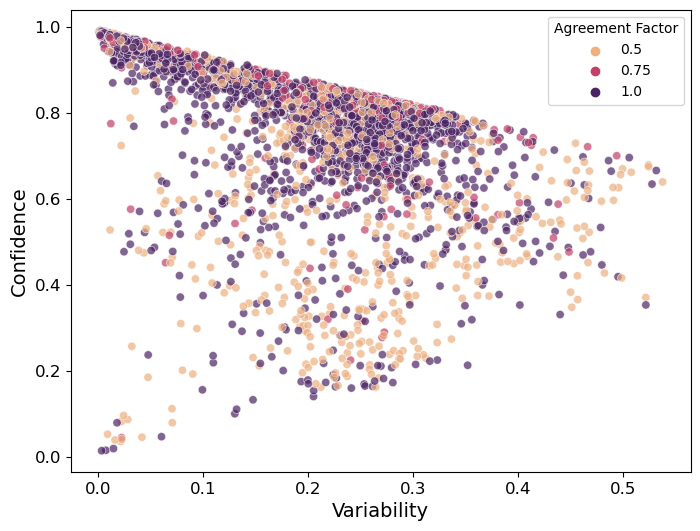

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='agreement_factor_rd', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/conf_vs_var_color_agreement_factor.png", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.5 vs. 0.75: Mann-Whitney-Wilcoxon test two-sided, P_val:1.078e-33 U_stat=1.261e+05
0.75 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.954e-19 U_stat=5.733e+05
0.5 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.413e-17 U_stat=8.162e+05


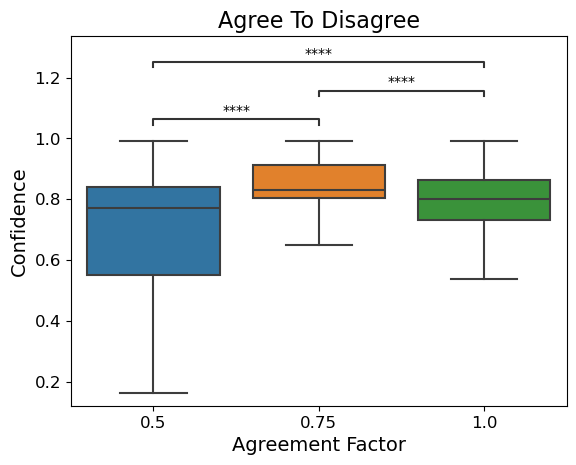

In [8]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False)

pairs=[(0.5, 0.75), (0.75, 1.0), (0.5, 1.0)]

annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')


In [9]:
cartography_df['label_text'] = cartography_df['label'].map({0: 'not fear', 1: 'fear'})

In [11]:
len(cartography_df)

3478

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.5_fear vs. 0.75_fear: Mann-Whitney-Wilcoxon test two-sided, P_val:1.078e-33 U_stat=1.261e+05
0.75_fear vs. 1.0_fear: Mann-Whitney-Wilcoxon test two-sided, P_val:1.426e-03 U_stat=6.271e+04
0.5_fear vs. 1.0_fear: Mann-Whitney-Wilcoxon test two-sided, P_val:4.304e-45 U_stat=7.811e+04


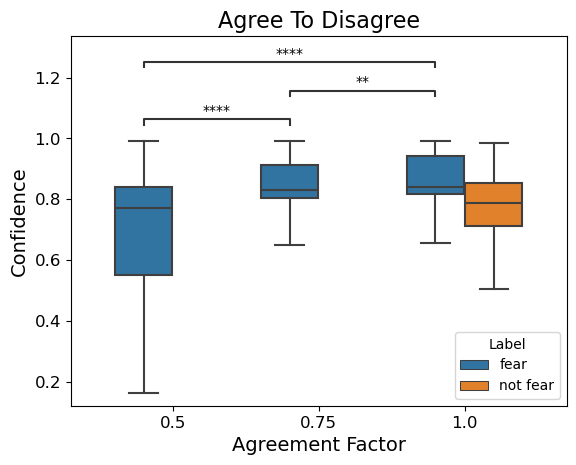

In [13]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False, hue='label_text')


pairs=[ ((0.5, 'fear'), (0.75, 'fear')), ((0.75, 'fear'), (1.0, 'fear')), ((0.5, 'fear'), (1.0, 'fear'))]


annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence", hue='label_text')
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title = 'Label', loc='lower right')
plt.savefig("./plots/agr_factor_vs_conf_hue.png", dpi=600, bbox_inches='tight')

In [14]:
cartography_df['label'].value_counts()

1    1739
0    1739
Name: label, dtype: int64

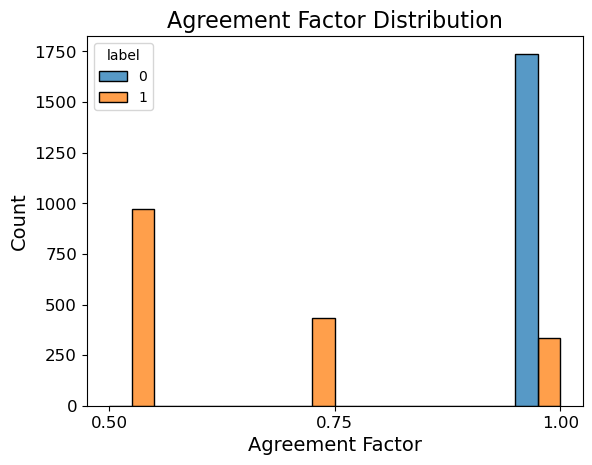

In [23]:
sns.histplot(data=cartography_df, x="agreement_factor_rd", hue='label', multiple='dodge', binwidth=0.05)
plt.title("Agreement Factor Distribution", fontsize=16)
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks([0.5, 0.75, 1.0], fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_hist.png", dpi=600, bbox_inches='tight')

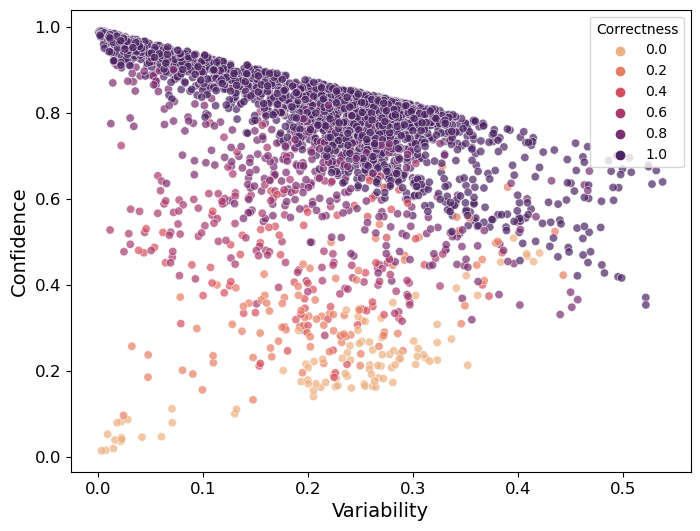

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Correctness', loc='upper right')
plt.savefig("./plots/conf_vs_var_color_correctness.png", dpi=600, bbox_inches='tight')

In [17]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.18357413966646716, pvalue=9.75183599056968e-28)

In [18]:
pearsonr(cartography_df[cartography_df['label']==1]['confidence'], cartography_df[cartography_df['label']==1]['agreement_factor_rd'])

PearsonRResult(statistic=0.37985421051504825, pvalue=8.450719876170917e-61)